# データ分析

for Python 3.7.+

## Pandas

Python でデータ分析を始めると真っ先に使われてるのが `pandas` というライブラリ。 

このライブラリは matrix 状のデータ操作をかなり容易に行うものです。  
CSV/Excel などのデータから二次元配列でデータを読み取る、歯抜けの状態をざっくり確認し、欠損値の補正や列単位でのデータ変換を行うといった操作ができます。

import と、データセットの読み込みをしてみます。  
有名どころで、Iris (アヤメ)データセットを用意しました。`iris.csv`

In [1]:
import pandas as pd
import numpy as np

datasets = pd.read_csv('./iris.csv')

`iris.csv` は中を見ていただくとわかりますが、以下のようなデータになっています。

```csv
sepal_length,sepal_width,petal_lebgth,petal_width,class
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
...
```

英語だとわかりづらいかもですが、以下のような意味です。

* sepal: がく
* petal: 花弁

アヤメの種類は、ガクと花弁の大きさで分類できる（と言うことらしい）ので、機械学習で良く扱われるデータの一つとなっています。

`head` で先頭部分を取り出してみましょう。

In [2]:
datasets.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


大分いい感じに取得できると思います。  
データを加工する前に、全体の情報をざっくり眺めます。

`info` を使えばどう言ったデータがあるのか、欠損値がどれ位あるかが見えます。

In [3]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


指定した列だけ取得

In [4]:
datasets['sepal_width']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

## データ操作

当然データを加工する必要があれば行うべきでしょう。  
ということで

### 転地

行列と見立てた操作ですね。

In [5]:
datasets.T

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
sepal_length,5.1,4.9,4.7,4.6,5,5.4,4.6,5,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal_width,3.5,3,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3,2.5,3,3.4,3
petal_length,1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5,5.2,5.4,5.1
petal_width,0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2,2.3,1.8
class,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,...,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica


### 列抽出

利用する行だけ抽出することもできます。

In [6]:
datasets[['sepal_length', 'sepal_width']]

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1


### 条件抽出

指定した条件でデータを取り出すことができます。

In [7]:
datasets[datasets['class'] == 'Iris-setosa']

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### 新しい列に計算した値を設定

スケールが異なる場合は比率を扱うデータ行を作りたいところですよね。

In [8]:
datasets['sepal_rate'] = datasets['sepal_length'] / datasets['sepal_width']
datasets

,sepal_length,sepal_width,petal_length,petal_width,class,sepal_rate
0,5.1,3.5,1.4,0.2,Iris-setosa,1.457143
1,4.9,3.0,1.4,0.2,Iris-setosa,1.633333
2,4.7,3.2,1.3,0.2,Iris-setosa,1.468750
3,4.6,3.1,1.5,0.2,Iris-setosa,1.483871
4,5.0,3.6,1.4,0.2,Iris-setosa,1.388889
5,5.4,3.9,1.7,0.4,Iris-setosa,1.384615
6,4.6,3.4,1.4,0.3,Iris-setosa,1.352941
7,5.0,3.4,1.5,0.2,Iris-setosa,1.470588
8,4.4,2.9,1.4,0.2,Iris-setosa,1.517241
9,4.9,3.1,1.5,0.1,Iris-setosa,1.580645


### 余計な行の削除

これは AI を作るときに、ノイズ的な行を残すと余計な学習をする場合があるので削除も時折します。  
作ったものを削除してみます

In [9]:
datasets = datasets.drop(['sepal_rate'], axis=1)
datasets

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### 平均/中央/再頻出値

ということで

In [10]:
print('平均  : ', datasets['sepal_length'].mean())
print('中央  : ', datasets['sepal_length'].median())
print('再頻出:', datasets['sepal_length'].mode())

平均  :  5.843333333333335
中央  :  5.8
再頻出: 0    5.0
dtype: float64


### 各種集計

分散と標準偏差も出してみます。

In [11]:
print('分散: ', datasets['sepal_length'].var())
print('標準偏差: ', datasets['sepal_length'].std())


分散:  0.6856935123042505
標準偏差:  0.8280661279778629


パーセンタイル値も取得できます。

In [12]:
datasets['sepal_length'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

## データの可視化(matplotlib)

データ解析らしくなってきました。  
データをグラフにすることで解釈しやすい様にします。

`student-mat.csv` ファイルをサンプルに置いたので、それを読んでみましょう。  
ちなみにデータ自体は http://archive.ics.uci.edu/ml/machine-learning-databases/ ここからDLできます。

単純に情報を読み取ってみます。  
データはどこぞの大学の学生と数学の成績です。

G1,G2,G3 は各期の成績ですね。

In [13]:
student_math = pd.read_csv('./student-mat.csv')
student_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

Matplotlib を取り込んでグラフ表示の準備をする。

In [14]:
import matplotlib as mpl
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

### ヒストグラム

単純にヒストグラムを表示する。

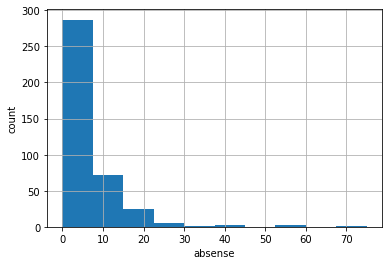

In [15]:
plt.hist(student_math['absences'])
plt.xlabel('absense')
plt.ylabel('count')

plt.grid(True)

### 箱ひげ図

* 最大値
* 75% 値 (第３四分位点)
* 中央値(赤線)
* 20% 値 (第1四分位点)
* 最小値

という見方をする図です。

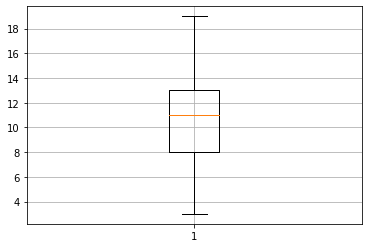

In [16]:
plt.boxplot(student_math['G1'])
plt.grid(True)

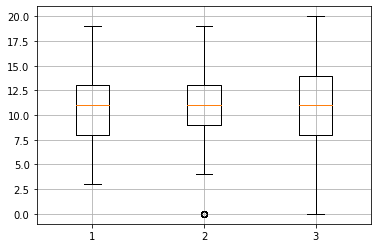

In [17]:
plt.boxplot([
    student_math['G1'],
    student_math['G2'],
    student_math['G3']
])
plt.grid(True)

### 散布図

見たまま分布がわかりますね。  


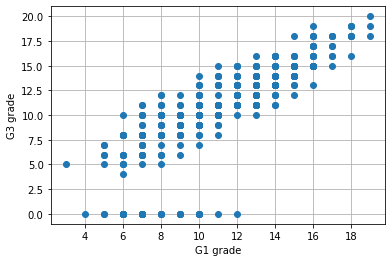

In [18]:
plt.plot(student_math['G1'], student_math['G3'], 'o')
plt.ylabel('G3 grade')
plt.xlabel('G1 grade')
plt.grid(True)

### 色々な図をまとめて

各行との相関をみる為のマトリクス状にグラフ化します。

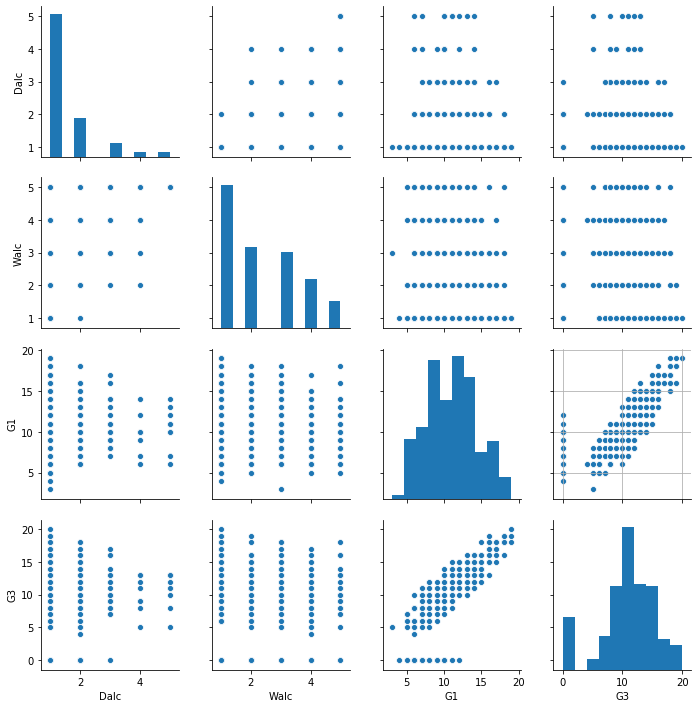

In [19]:
sns.pairplot(student_math[['Dalc', 'Walc', 'G1', 'G3']])
plt.grid(True)